# Pycaret Models

In [58]:
import numpy as np
import pandas as pd
import pycaret as py

In [3]:
from ydata_profiling import ProfileReport
from pycaret.classification import*

In [ ]:
# 0 = no disease and 1 = disease for Target

In [10]:
df = pd.read_csv('./data/heart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
df.shape

(1025, 14)

In [14]:
data = df

In [21]:
# Approx. 15% unseen
data_unseen = data.sample(n=150, random_state=0)
data   = data.drop(data_unseen.index)
print(data.shape)
print(data_unseen.shape)

(875, 14)
(150, 14)


In [25]:
data.to_csv('./data/heartdata.csv', index=False)

In [26]:
data_unseen.to_csv('./data/unseen_heartdata.csv', index=False)

In [31]:
df = data

In [32]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0


In [33]:
s = setup(df, target = 'target', session_id=0);

,Description,Value
0,Session id,0
1,Target,target
2,Target type,Binary
3,Original data shape,"(875, 14)"
4,Transformed data shape,"(875, 14)"
5,Transformed train set shape,"(612, 14)"
6,Transformed test set shape,"(263, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [34]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9788,0.9989,0.9749,0.9847,0.9793,0.9576,0.9585,0.2590
catboost,CatBoost Classifier,0.9787,0.9917,0.9780,0.9815,0.9794,0.9575,0.9582,0.8980
lightgbm,Light Gradient Boosting Machine,0.9771,0.9907,0.9780,0.9785,0.9779,0.9542,0.9549,0.3560
rf,Random Forest Classifier,0.9738,0.9971,0.9718,0.9783,0.9746,0.9477,0.9484,0.2610
xgboost,Extreme Gradient Boosting,0.9707,0.9870,0.9780,0.9672,0.9720,0.9412,0.9424,0.1570
dt,Decision Tree Classifier,0.9674,0.9673,0.9749,0.9639,0.9688,0.9347,0.9359,0.0980
gbc,Gradient Boosting Classifier,0.9526,0.9843,0.9654,0.9461,0.9548,0.9050,0.9068,0.2120
ada,Ada Boost Classifier,0.8873,0.9553,0.9052,0.8799,0.8916,0.7741,0.7761,0.1790
lr,Logistic Regression,0.8532,0.9131,0.8994,0.8346,0.8647,0.7051,0.7095,1.2240
ridge,Ridge Classifier,0.8483,0.0000,0.9307,0.8084,0.8644,0.6944,0.7052,0.0920


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [35]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9677,0.9958,0.9688,0.9688,0.9688,0.9354,0.9354
2,0.9836,0.9957,1.0000,0.9697,0.9846,0.9671,0.9676
3,0.9508,0.9774,0.9062,1.0000,0.9508,0.9019,0.9062
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9508,0.9903,0.9375,0.9677,0.9524,0.9016,0.9020
6,0.9836,0.9978,1.0000,0.9697,0.9846,0.9671,0.9676
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9344,0.9495,0.9677,0.9091,0.9375,0.8687,0.8706


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [36]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9516,0.9938,0.9375,0.9677,0.9524,0.9032,0.9037
2,0.9836,1.0000,1.0000,0.9697,0.9846,0.9671,0.9676
3,0.9508,0.9957,0.9062,1.0000,0.9508,0.9019,0.9062
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9508,0.9925,0.9375,0.9677,0.9524,0.9016,0.9020
6,0.9672,0.9968,0.9688,0.9688,0.9688,0.9343,0.9343
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9344,0.9925,0.9677,0.9091,0.9375,0.8687,0.8706


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [37]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9839,0.9990,1.0000,0.9697,0.9846,0.9677,0.9682
1,0.9516,0.9953,0.9375,0.9677,0.9524,0.9032,0.9037
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9508,0.9989,0.9062,1.0000,0.9508,0.9019,0.9062
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9672,0.9989,0.9375,1.0000,0.9677,0.9345,0.9365
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9344,0.9968,0.9677,0.9091,0.9375,0.8687,0.8706


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [38]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9839,1.0000,1.0000,0.9697,0.9846,0.9677,0.9682
1,0.9677,0.9896,0.9688,0.9688,0.9688,0.9354,0.9354
2,0.9836,0.9946,1.0000,0.9697,0.9846,0.9671,0.9676
3,0.9508,0.9688,0.9062,1.0000,0.9508,0.9019,0.9062
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9508,0.9871,0.9375,0.9677,0.9524,0.9016,0.9020
6,0.9836,0.9978,1.0000,0.9697,0.9846,0.9671,0.9676
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9344,0.9796,0.9677,0.9091,0.9375,0.8687,0.8706


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [40]:
final_lightgbm = finalize_model(tuned_lightgbm)
final_lightgbm

Pipeline(memory=FastMemory(location=C:\Users\lukem\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'sex', 'cp', 'trestbps',
                                             'chol', 'fbs', 'restecg',
                                             'thalach', 'exang', 'oldpeak',
                                             'slope', 'ca', 'thal'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missi...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None, random_state=0,
                                reg_alpha=0.0, reg_lambda=0.0, silent='warn',
                                subsample=1.0, subsample_for_bin=200000,
                                subsample_freq=0))],
         verbose=False)

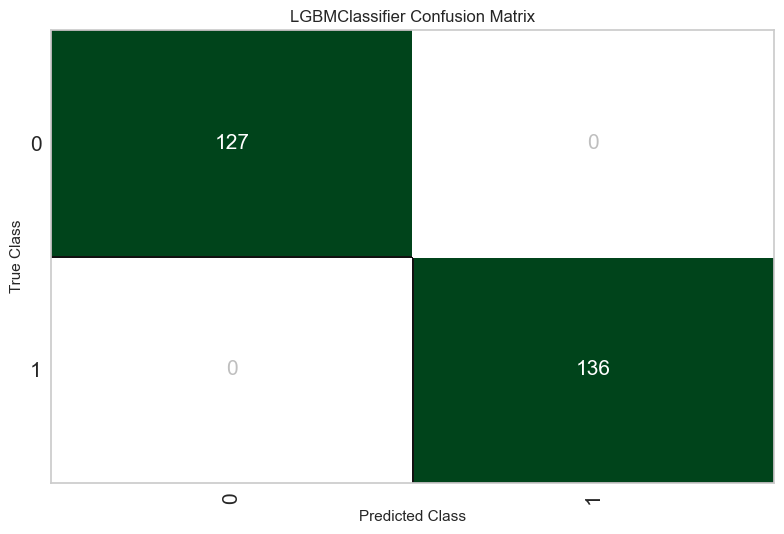

In [42]:
plot_model(final_lightgbm, plot='confusion_matrix')

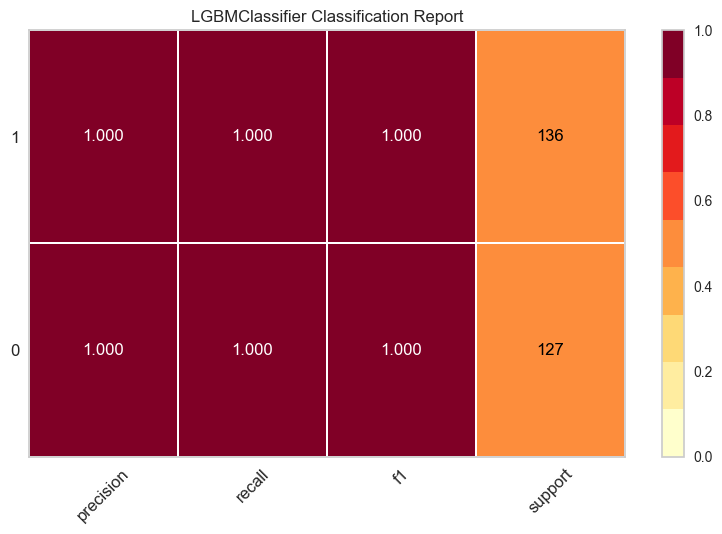

In [43]:
plot_model(final_lightgbm, plot='class_report')

In [45]:
unseen = pd.read_csv('./data/unseen_heartdata.csv')
unseen.shape

(150, 14)

In [46]:
pred_unseen = predict_model(final_lightgbm, data=unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


# Scikit Learn Confusion Matrix and Metrics 

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import precision_score

import seaborn as sns

In [47]:
pred_unseen

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,prediction_label,prediction_score
0,44,1,2,130,233,0,1,179,1,0.4,2,0,2,1,1,0.9998
1,58,0,1,136,319,1,0,152,0,0.0,2,2,2,0,0,0.9830
2,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0,0,0.9995
3,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1,1,0.9994
4,61,1,0,120,260,0,1,140,1,3.6,1,1,3,0,0,0.9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,48,1,1,130,245,0,0,180,0,0.2,1,0,2,1,1,0.9988
146,54,0,1,132,288,1,0,159,1,0.0,2,1,2,1,1,0.9957
147,45,1,0,104,208,0,0,148,1,3.0,1,0,2,1,1,0.9889
148,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1,1,0.9933


In [51]:
y_true = pred_unseen['target']
y_pred = pred_unseen['prediction_label']
cm = confusion_matrix(y_true, y_pred, labels=[0,1])
cm

array([[77,  0],
       [ 0, 73]], dtype=int64)

In [54]:
ind = index=['N', 'P']
df_cm = pd.DataFrame(cm,index=ind, columns=ind)
df_cm

,N,P
N,77,0
P,0,73


In [55]:
tp = df_cm.loc['P','P']
tn = df_cm.loc['N','N']
fp = df_cm.loc['N','P']
fn = df_cm.loc['P','N']

In [57]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * ((precision * recall) / (precision + recall))
print(f'Calculated Metrics:\nAccuracy: {accuracy}\nPrecision {precision}\nRecall: {recall}\nF1: {f1}')

Calculated Metrics:
Accuracy: 1.0
Precision 1.0
Recall: 1.0
F1: 1.0


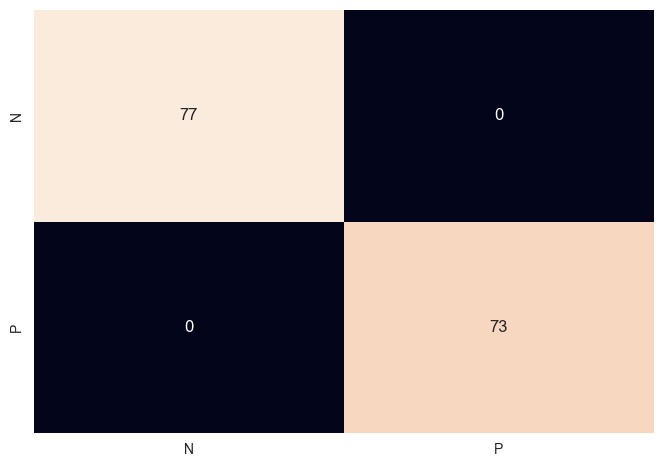

In [59]:
sns.heatmap(df_cm, annot=True, cbar=False);